In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/early-stage-diabetes-risk-prediction/diabetes_risk_prediction_dataset.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import sklearn
from folium.plugins import HeatMap 
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, XGBRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import shap

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/kaggle/input/early-stage-diabetes-risk-prediction/diabetes_risk_prediction_dataset.csv')

In [4]:
df.head(-10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,35,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
506,61,Male,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Negative
507,60,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,Negative
508,58,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,No,Negative


In [5]:
df.columms = df.columns.str.lower()
df.replace({'Yes': 1}, inplace=True)
df.replace({'No': 0}, inplace=True)
#df.replace({'Positive': 1}, inplace=True)
#df.replace({'Negative': 0}, inplace=True)
df.head()

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


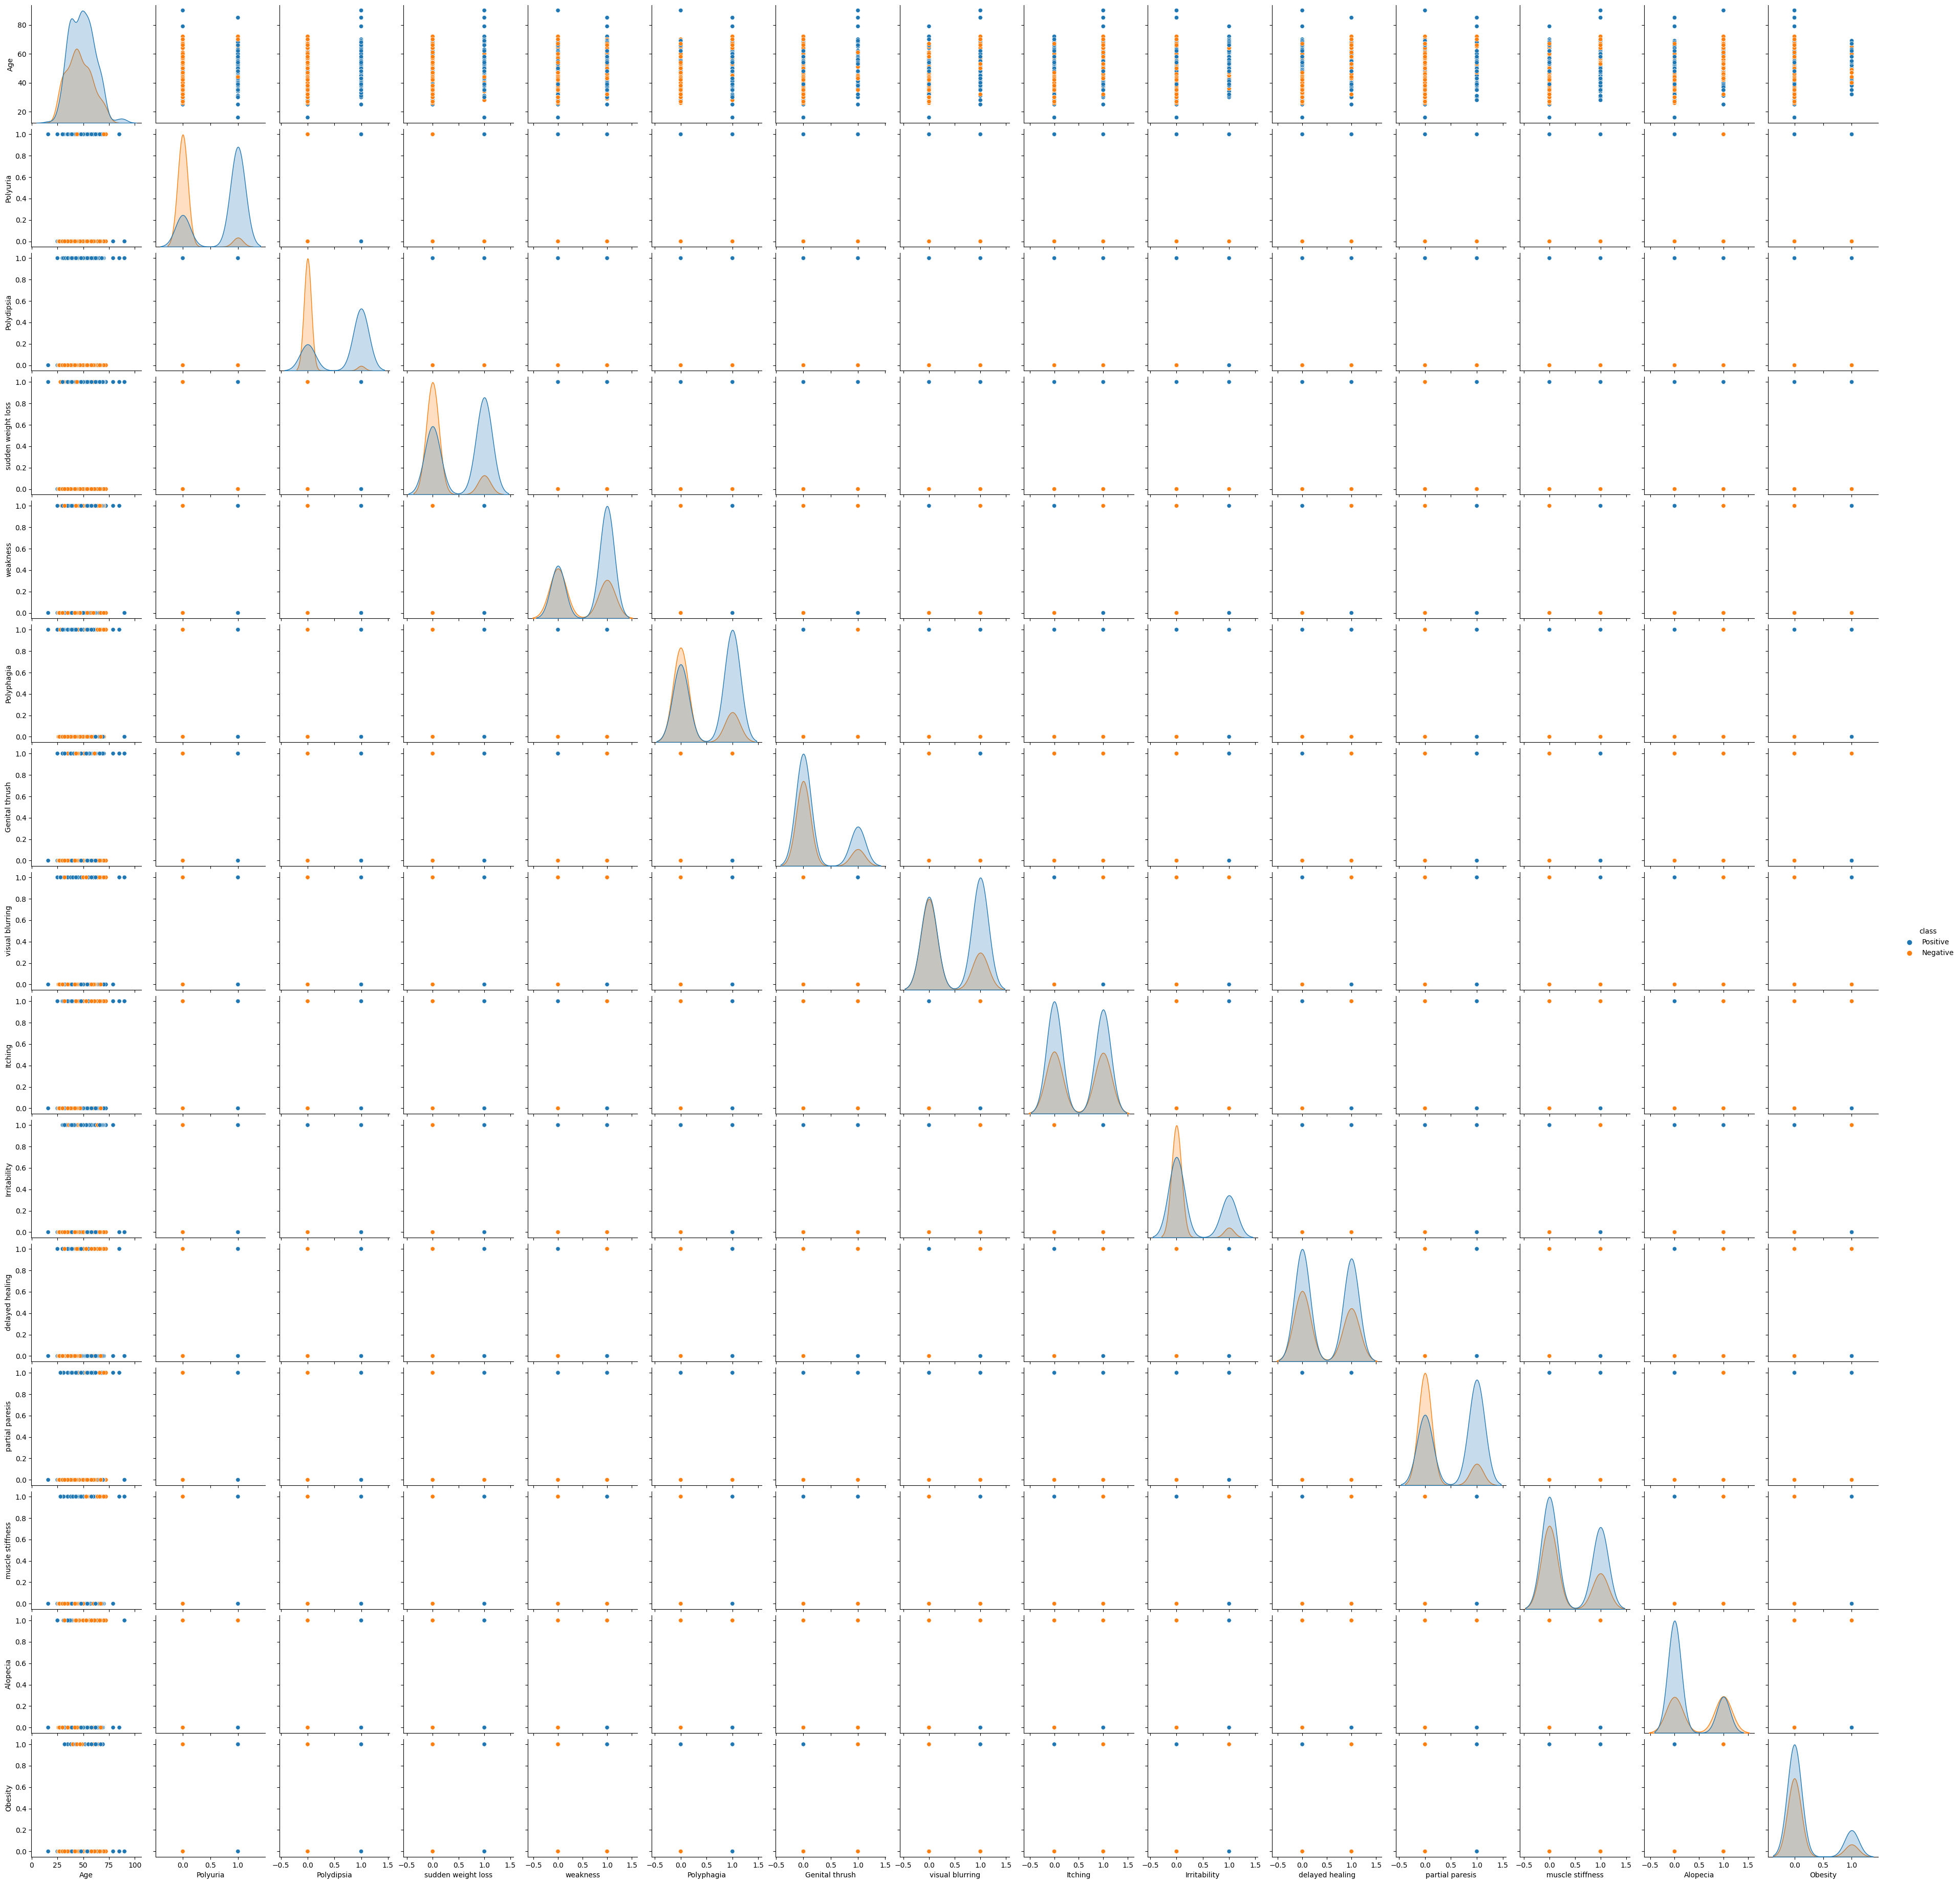

In [6]:
sns.pairplot(df,hue = 'class')

In [7]:
X = df.iloc[:,:-2].copy()
y = df.iloc[:,-1:].copy()
X = pd.get_dummies(X)
X ['Gender_Female'] = X ['Gender_Female'].astype(int)
X ['Gender_Male'] = X ['Gender_Male'].astype(int)
X.head()

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Gender_Female,Gender_Male
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1


In [8]:
y.replace({'Positive': 1}, inplace=True)
y.replace({'Negative': 0}, inplace=True)
y.head(-10)

,class
0,1
1,1
2,1
3,1
4,1
...,...
505,0
506,0
507,0
508,0


In [9]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape},y_test: {y_test.shape}')

X_train: (416, 16), y_train: (416, 1), X_test: (104, 16),y_test: (104, 1)


In [10]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
y_pred_dt = dt_model.predict(X_test)
confusion_matrix(y_test, y_pred_dt)

array([[32,  1],
       [ 5, 66]])

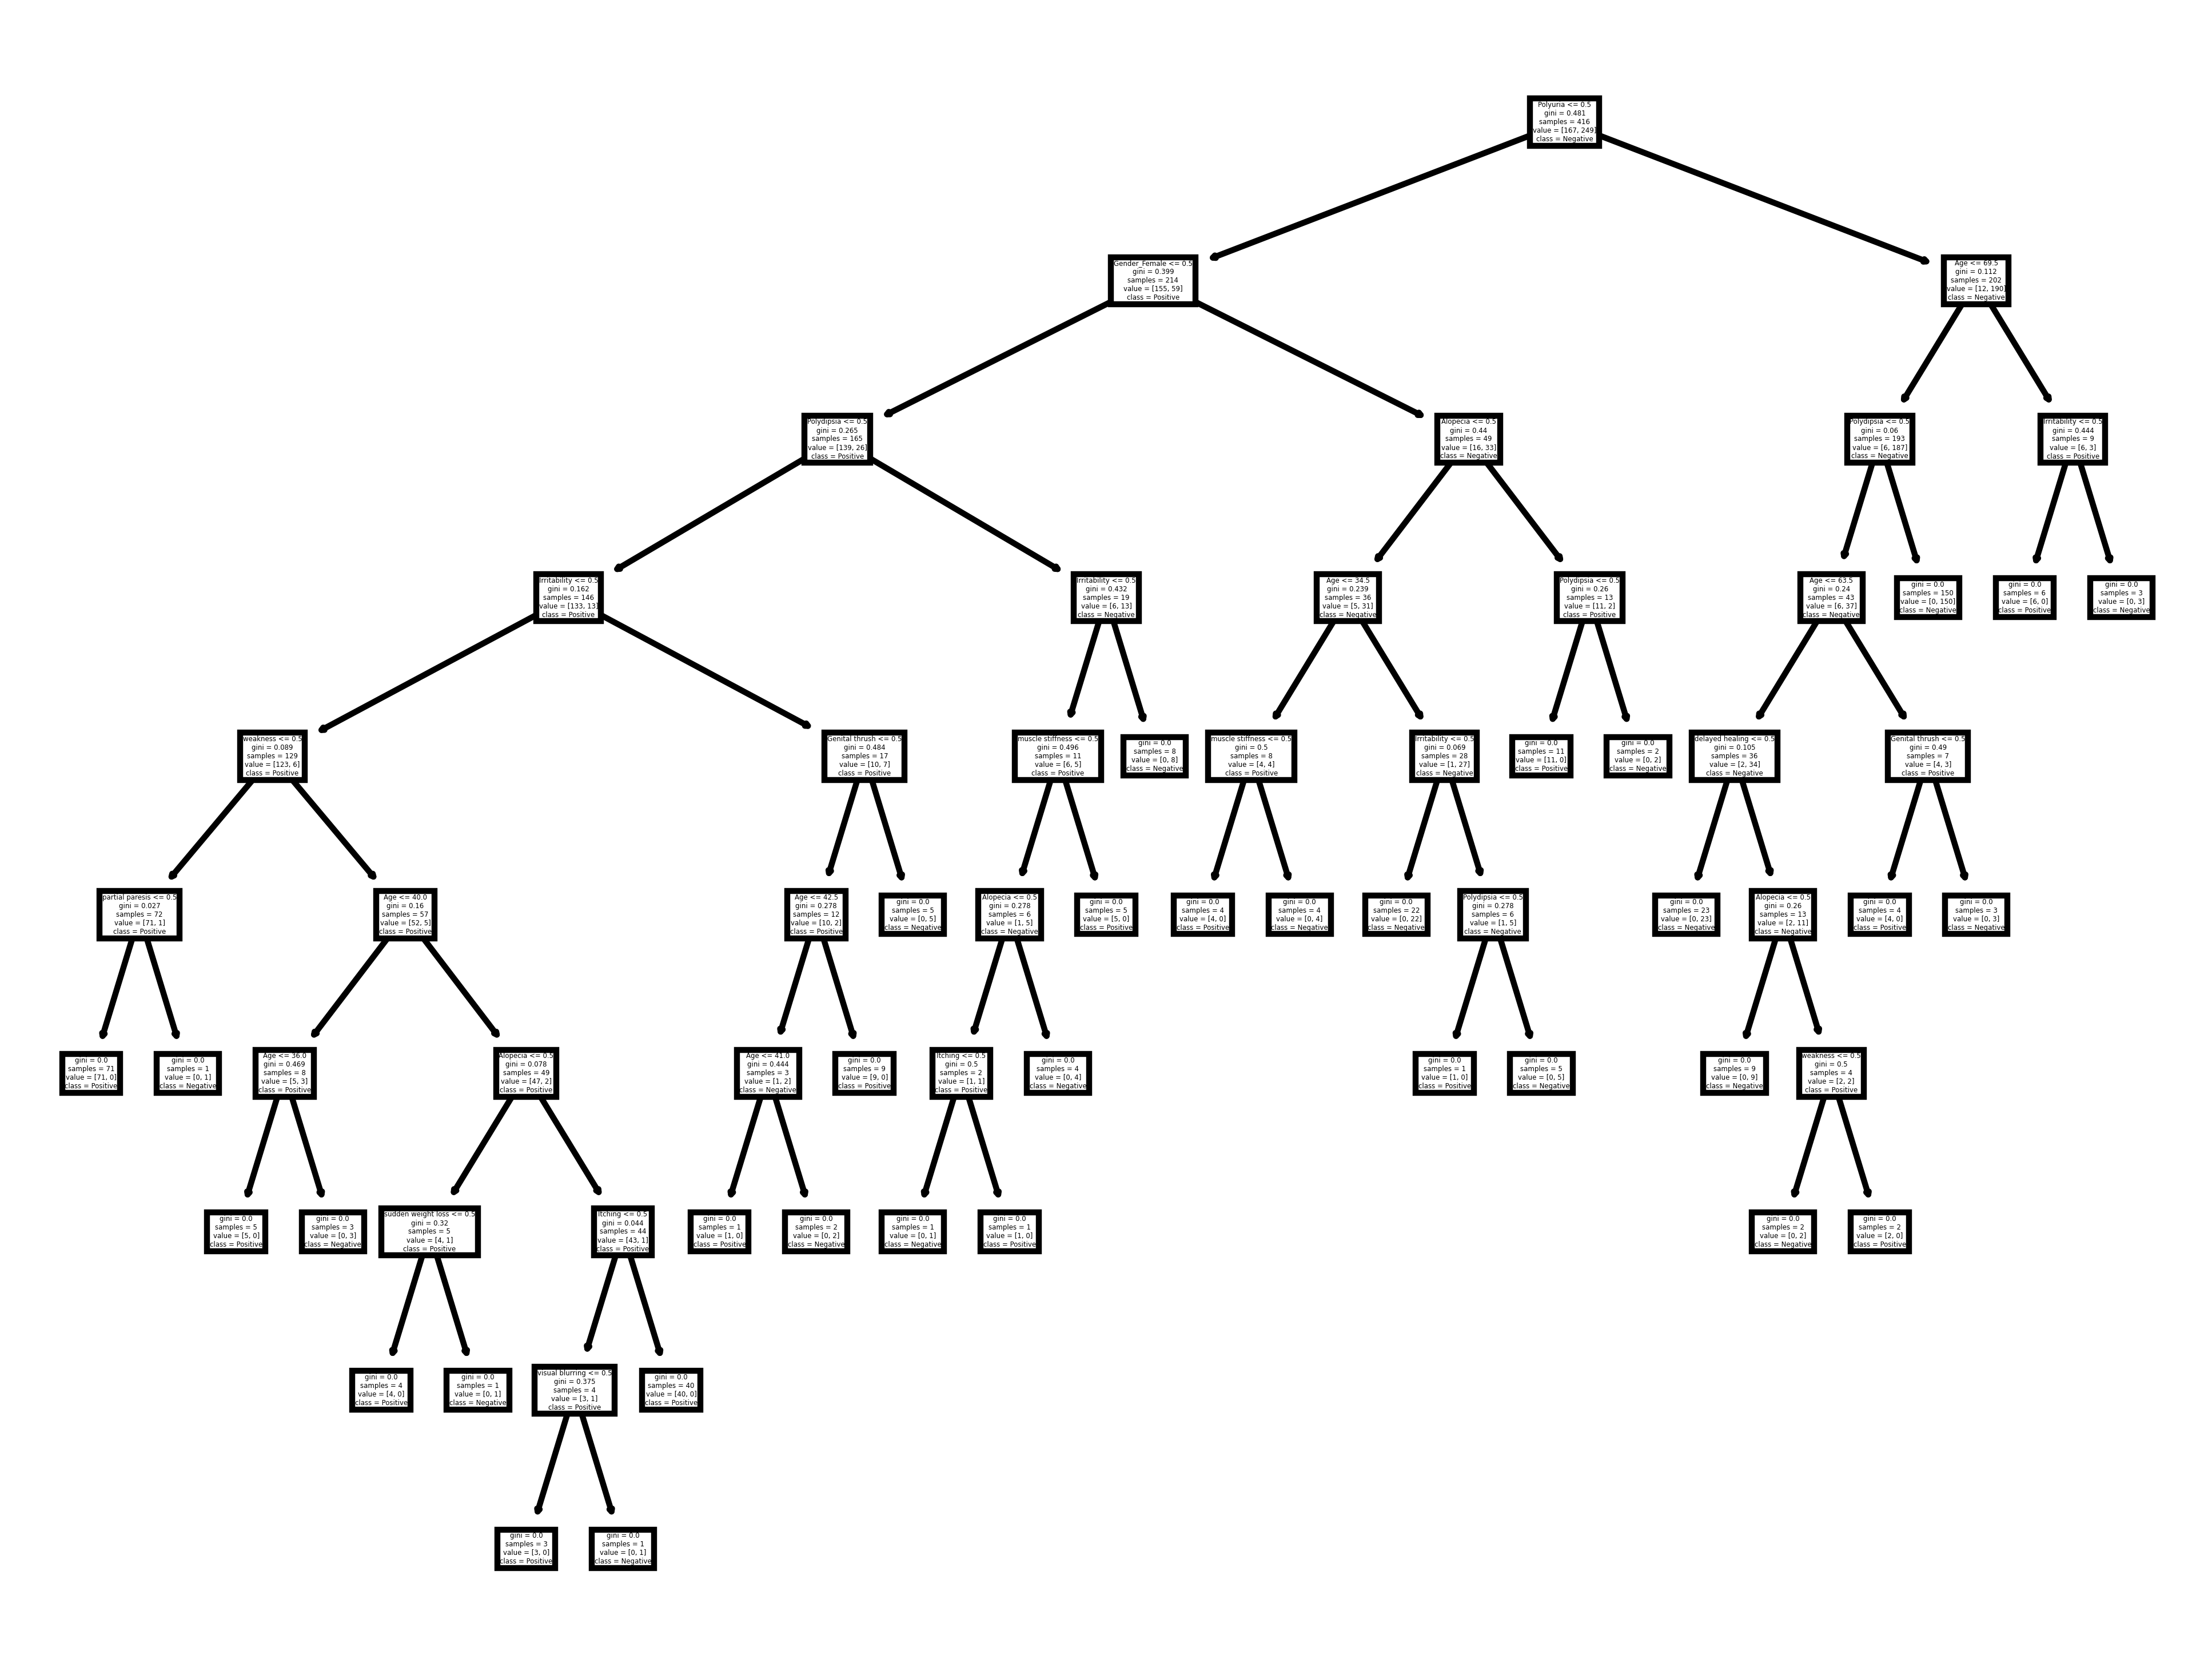

In [12]:
plt.figure(dpi=750)
plot_tree(dt_model, feature_names=X.columns, class_names=['Positive','Negative']);

In [13]:
importances_dt = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(dt_model.feature_importances_,3)})
importances_dt = importances_dt.sort_values('Importance', ascending=False).set_index('Feature')
importances_dt

,Importance
Feature,
Polyuria,0.460
Age,0.107
Gender_Female,0.101
Polydipsia,0.091
Alopecia,0.059
Irritability,0.055
Genital thrush,0.042
muscle stiffness,0.039
weakness,0.012


In [14]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier()

In [15]:
y_pred_rf = rf_model.predict(X_test)
confusion_matrix(y_test, y_pred_rf)

array([[33,  0],
       [ 1, 70]])

In [16]:
importances_rf = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(rf_model.feature_importances_,3)})
importances_rf = importances_rf.sort_values('Importance', ascending=False).set_index('Feature')
importances_rf

,Importance
Feature,
Polyuria,0.229
Polydipsia,0.191
Age,0.099
sudden weight loss,0.065
Gender_Male,0.061
Gender_Female,0.055
Alopecia,0.045
Irritability,0.041
partial paresis,0.039


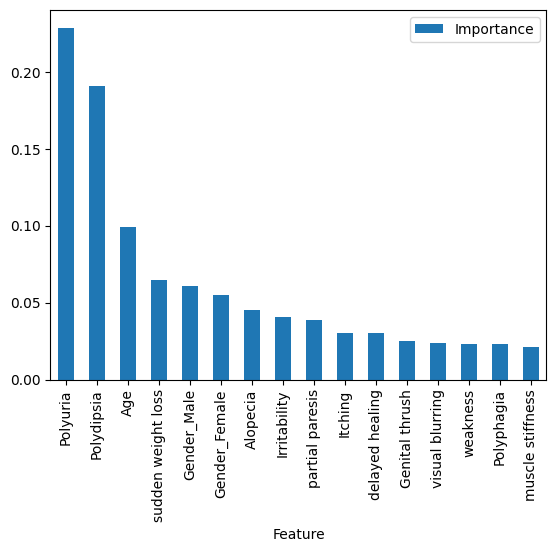

In [17]:
importances_rf.plot.bar();

[23:17:28] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


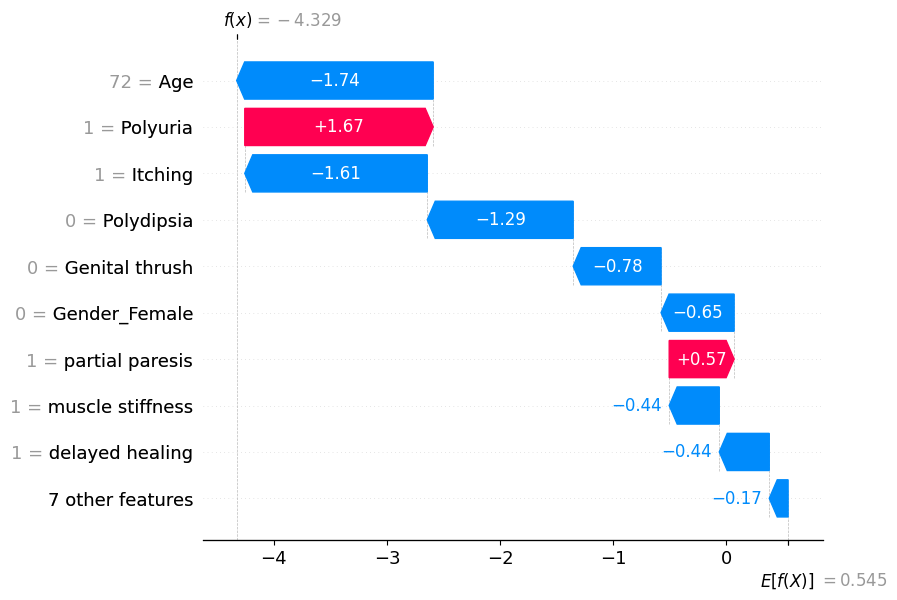

In [18]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

explainer = shap.Explainer(xgb_model)
shap_values_classification = explainer(X_test)
shap.plots.waterfall(shap_values_classification[0])

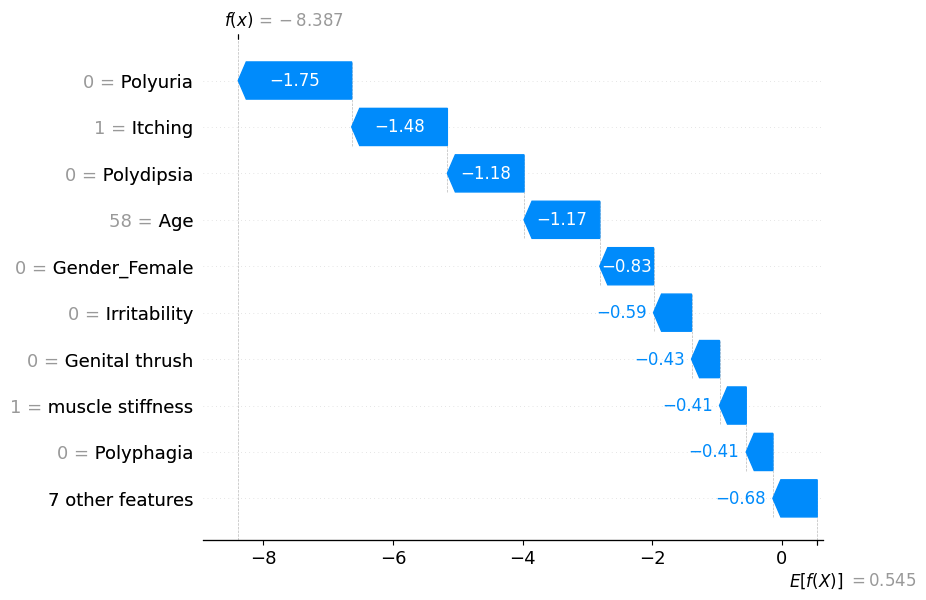

In [19]:
shap.plots.waterfall(shap_values_classification[13])

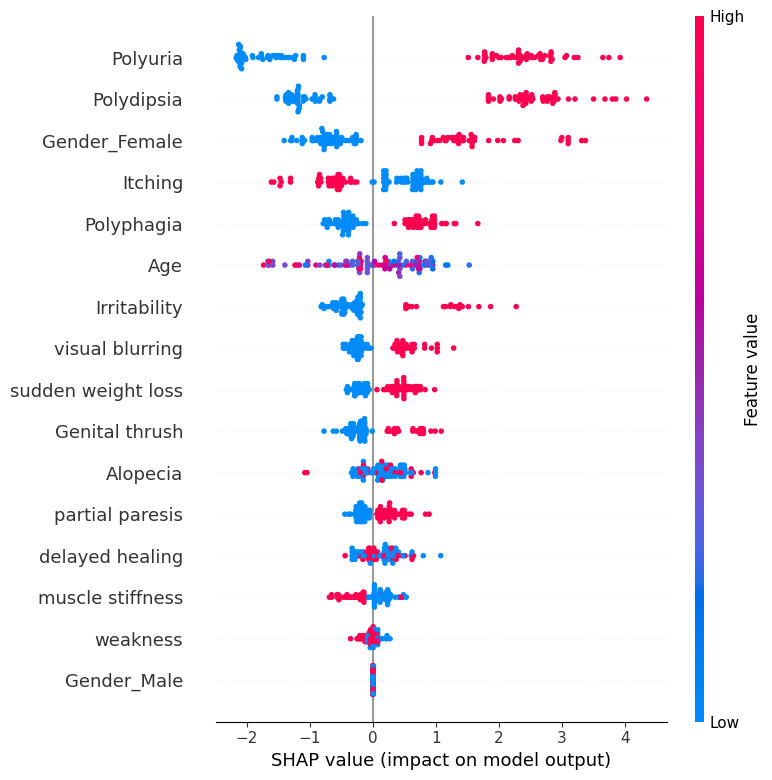

In [20]:
shap_values_regression = explainer(X_test)
shap.summary_plot(shap_values_regression, X_test)


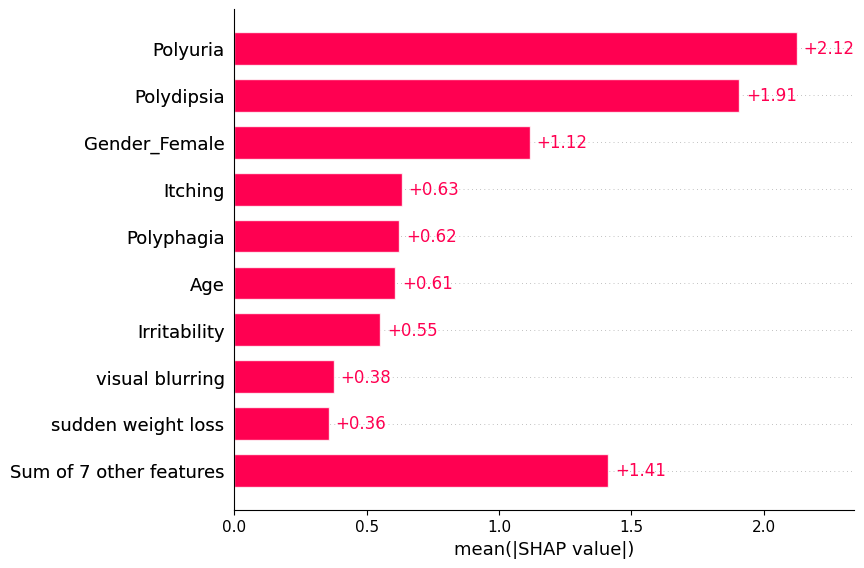

In [21]:
shap.plots.bar(shap_values_regression)